In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
path = os.getcwd()
data_path = 'C:\\Users\\sunil\\Projects\\Dockship\\Exam Mark Prediction\\Dataset'
sub_path = 'C:\\Users\\sunil\\Projects\\Dockship\\Exam Mark Prediction\\Submissions'

#### Preprocessing ####
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, LeaveOneOut

le = LabelEncoder()
scaler = MinMaxScaler()

#### Models ####
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.svm import SVR

#### Evaluation ####
from sklearn.metrics import mean_squared_error

In [22]:
train = pd.read_csv(data_path+ '\\train.csv')
test = pd.read_csv(data_path+ '\\test.csv')
sample_sub = pd.read_csv(data_path+ '\\sample_submissions.csv')

In [23]:
train.drop('Unnamed: 0', axis = 1, inplace=True)
test.drop('Unnamed: 0', axis = 1, inplace=True)

In [24]:
def mapper(x):
    if x<55:
        return 1
    elif x<65:
        return 2
    elif x<80:
        return 3
    return 4

In [25]:
train['Mark_Class'] = train['math score'].apply(lambda x: mapper(x))

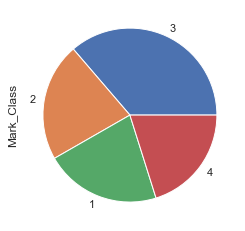

In [26]:
train['Mark_Class'].value_counts().plot.pie()

---
# Preprocessing

In [27]:
t_train, t_test = train.drop('math score', axis=1), test.copy()

In [33]:
df = pd.concat([t_train, t_test], axis = 0).reset_index(drop=True)

In [34]:
target = 'Mark_Class'

cat_cols = ['gender', 'ethnicity', 'parental level of education', 'lunch',
       'test preparation course', ]

num_cols = ['reading score', 'writing score']

In [35]:
#df[cat_cols] = df[cat_cols].apply(le.fit_transform)

df = pd.get_dummies(data=df, columns=cat_cols, drop_first=True)

In [36]:
from sklearn.metrics import f1_score, accuracy_score

# Train Test Split

In [37]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop=True)

In [38]:
features = [col for col in test_proc.columns if col not in [target]]

In [40]:
trn, val = train_test_split(train_proc, test_size = 0.2, random_state = 1999)

##### Input for model
X_trn, X_val = trn[features], val[features]

##### Target column
y_trn, y_val = trn[target], val[target]

##### Features for test data that we will be predicting
X_test = test_proc[features]

In [53]:
cat = CatBoostClassifier(random_state = 1)
cat.fit(X_trn, y_trn)

preds = cat.predict(X_val)
accuracy_score(y_val, preds)

Learning rate set to 0.076821
0:	learn: 1.3277079	total: 1.85ms	remaining: 1.85s
1:	learn: 1.2645924	total: 3.31ms	remaining: 1.65s
2:	learn: 1.2231972	total: 4.74ms	remaining: 1.57s
3:	learn: 1.1856718	total: 6.06ms	remaining: 1.51s
4:	learn: 1.1449112	total: 7.43ms	remaining: 1.48s
5:	learn: 1.0964867	total: 9.1ms	remaining: 1.51s
6:	learn: 1.0648978	total: 10.7ms	remaining: 1.51s
7:	learn: 1.0313625	total: 12.2ms	remaining: 1.51s
8:	learn: 1.0001284	total: 13.7ms	remaining: 1.51s
9:	learn: 0.9731220	total: 15.6ms	remaining: 1.55s
10:	learn: 0.9485844	total: 17.5ms	remaining: 1.57s
11:	learn: 0.9237824	total: 19ms	remaining: 1.56s
12:	learn: 0.8997644	total: 20.5ms	remaining: 1.55s
13:	learn: 0.8796407	total: 22ms	remaining: 1.55s
14:	learn: 0.8607290	total: 23.4ms	remaining: 1.54s
15:	learn: 0.8444026	total: 24.9ms	remaining: 1.53s
16:	learn: 0.8290616	total: 26.8ms	remaining: 1.55s
17:	learn: 0.8142557	total: 28.7ms	remaining: 1.57s
18:	learn: 0.8001662	total: 30.2ms	remaining: 1.5

249:	learn: 0.3047481	total: 328ms	remaining: 983ms
250:	learn: 0.3039360	total: 329ms	remaining: 981ms
251:	learn: 0.3031712	total: 330ms	remaining: 979ms
252:	learn: 0.3025543	total: 331ms	remaining: 978ms
253:	learn: 0.3015889	total: 332ms	remaining: 976ms
254:	learn: 0.3003021	total: 333ms	remaining: 974ms
255:	learn: 0.2996882	total: 335ms	remaining: 972ms
256:	learn: 0.2988337	total: 336ms	remaining: 971ms
257:	learn: 0.2982303	total: 337ms	remaining: 969ms
258:	learn: 0.2971996	total: 338ms	remaining: 967ms
259:	learn: 0.2962184	total: 339ms	remaining: 966ms
260:	learn: 0.2956378	total: 340ms	remaining: 964ms
261:	learn: 0.2948061	total: 342ms	remaining: 963ms
262:	learn: 0.2937855	total: 343ms	remaining: 962ms
263:	learn: 0.2927733	total: 344ms	remaining: 960ms
264:	learn: 0.2922613	total: 346ms	remaining: 959ms
265:	learn: 0.2917962	total: 347ms	remaining: 957ms
266:	learn: 0.2909714	total: 348ms	remaining: 955ms
267:	learn: 0.2903792	total: 349ms	remaining: 953ms
268:	learn: 

534:	learn: 0.1812151	total: 665ms	remaining: 578ms
535:	learn: 0.1809248	total: 666ms	remaining: 577ms
536:	learn: 0.1806247	total: 667ms	remaining: 575ms
537:	learn: 0.1804422	total: 668ms	remaining: 574ms
538:	learn: 0.1802521	total: 670ms	remaining: 573ms
539:	learn: 0.1800706	total: 671ms	remaining: 571ms
540:	learn: 0.1798004	total: 672ms	remaining: 570ms
541:	learn: 0.1794336	total: 673ms	remaining: 569ms
542:	learn: 0.1792431	total: 675ms	remaining: 568ms
543:	learn: 0.1787191	total: 676ms	remaining: 567ms
544:	learn: 0.1783037	total: 677ms	remaining: 566ms
545:	learn: 0.1779975	total: 679ms	remaining: 564ms
546:	learn: 0.1777681	total: 680ms	remaining: 563ms
547:	learn: 0.1775916	total: 681ms	remaining: 562ms
548:	learn: 0.1774428	total: 682ms	remaining: 560ms
549:	learn: 0.1772580	total: 683ms	remaining: 559ms
550:	learn: 0.1768126	total: 685ms	remaining: 558ms
551:	learn: 0.1766304	total: 686ms	remaining: 557ms
552:	learn: 0.1763365	total: 687ms	remaining: 555ms
553:	learn: 

812:	learn: 0.1258182	total: 1s	remaining: 230ms
813:	learn: 0.1256964	total: 1s	remaining: 229ms
814:	learn: 0.1255218	total: 1s	remaining: 228ms
815:	learn: 0.1253582	total: 1s	remaining: 227ms
816:	learn: 0.1252225	total: 1.01s	remaining: 225ms
817:	learn: 0.1250703	total: 1.01s	remaining: 224ms
818:	learn: 0.1249188	total: 1.01s	remaining: 223ms
819:	learn: 0.1247878	total: 1.01s	remaining: 222ms
820:	learn: 0.1245973	total: 1.01s	remaining: 220ms
821:	learn: 0.1243176	total: 1.01s	remaining: 219ms
822:	learn: 0.1241631	total: 1.01s	remaining: 218ms
823:	learn: 0.1240782	total: 1.01s	remaining: 217ms
824:	learn: 0.1239345	total: 1.01s	remaining: 215ms
825:	learn: 0.1238000	total: 1.02s	remaining: 214ms
826:	learn: 0.1236431	total: 1.02s	remaining: 213ms
827:	learn: 0.1235076	total: 1.02s	remaining: 212ms
828:	learn: 0.1233588	total: 1.02s	remaining: 211ms
829:	learn: 0.1232747	total: 1.02s	remaining: 209ms
830:	learn: 0.1231638	total: 1.02s	remaining: 208ms
831:	learn: 0.1230184	to

0.6428571428571429